# 2440054001_Cheryl Almeira_DL_No 2

2. Tugas kalian saat ini adalah membuat clickbait classification dari dataset dari https://bit.ly/FinalExamDeepLearningData dengan nama file “clickbait.csv”. Dataset diambil dari beberapa situs berita seperti “BuzzFeed”, “Upworthy”, “ViralNova” dan lain-lainnya.

a. [LO 1, LO 2, LO 3, LO 4, 10 poin] Lakukan proses preprocess dan prepare dataset,
Jelaskan setiap step yang dilakukan disertai dengan konsep-konsep dalam NLP.

b. [LO 1, LO 2, LO 3, LO 4, 10 poin] Buatlah arsitektur tanpa menggunakan pre-trained
model untuk mengatasi problematika clickbait classification dengan menggunakan
arsitektur yang tepat. Jelaskan pemilihan arsitektur yang dibuat dan konsep dasar dari
arsitektur yang dipilih.

c. [LO 1, LO 2, LO 3, LO 4, 15 poin] Buatlah sebuah multi class classifier model
menggunakan pre-trained model dan latihlah dataset sampai mendapatkan akurasi
yang di inginkan. Jelaskan alasan kalian menggunakan pre-trained model yang kalian
pilih.

d. [LO 1, LO 2 & LO 3, LO 4 15 poin] Lakukan analisis performance pada dataset testing
(cari nilai f-1-score, precision, recall dan accuracy) dari model yang dibuat dari 1b dan
1c. Berikan penjelasan mengenai hasil yang didapatkan dengan lengkap dan bandingkan
hasil mana yang lebih baik?

In [57]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [15]:
df = pd.read_csv('/kaggle/input/clickbait/clickbait.csv')

In [16]:
df.head()

,headline,clickbait
0,Should I Get Bings,1
1,Which TV Female Friend Group Do You Belong In,1
2,"The New ""Star Wars: The Force Awakens"" Trailer...",1
3,"This Vine Of New York On ""Celebrity Big Brothe...",1
4,A Couple Did A Stunning Photo Shoot With Their...,1


In [17]:
df.tail()

,headline,clickbait
31995,"To Make Female Hearts Flutter in Iraq, Throw a...",0
31996,"British Liberal Democrat Patsy Calton, 56, die...",0
31997,Drone smartphone app to help heart attack vict...,0
31998,"Netanyahu Urges Pope Benedict, in Israel, to D...",0
31999,Computer Makers Prepare to Stake Bigger Claim ...,0


In [18]:
df.shape

(32000, 2)

In [19]:
print("Jumlah Baris",df.shape[0])
print("Jumlah Kolom", df.shape[1])

Jumlah Baris 32000
Jumlah Kolom 2


In [20]:
df.isna()

,headline,clickbait
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
31995,False,False
31996,False,False
31997,False,False
31998,False,False


In [21]:
df.isna().sum()

headline     0
clickbait    0
dtype: int64

<AxesSubplot:>

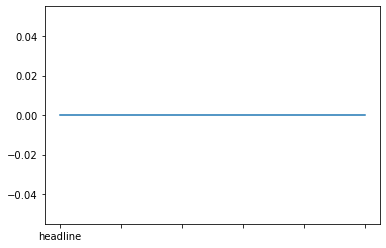

In [22]:
df.isna().sum().plot()

In [23]:
df['clickbait'].value_counts()

0    16001
1    15999
Name: clickbait, dtype: int64

In [24]:
count = 16001+15999
print('Persentase Label 0 :', 16001/count)
print('Persentase Label 1 :', 15999/count)

Persentase Label 0 : 0.50003125
Persentase Label 1 : 0.49996875


In [59]:
encoder = LabelEncoder()
df['clickbait'] = encoder.fit_transform(df['clickbait'])

In [60]:
train_data, test_data, train_labels, test_labels = train_test_split(
    df['headline'], df['clickbait'], test_size=0.2)

In [61]:
tokenizer = keras.preprocessing.text.Tokenizer(num_words=11000)
tokenizer.fit_on_texts(train_data)
train_data = tokenizer.texts_to_matrix(train_data)
test_data = tokenizer.texts_to_matrix(test_data)

In [63]:
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(11000,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [65]:
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# fit the model on the training data
history = model.fit(train_data, train_labels, epochs=15, batch_size=32, validation_data=(test_data, test_labels))

2023-02-07 05:15:04.304212: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1126400000 exceeds 10% of free system memory.
2023-02-07 05:15:05.554454: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1126400000 exceeds 10% of free system memory.


Epoch 1/15
800/800 [==============================] - 4s 4ms/step - loss: 0.0011 - accuracy: 0.9997 - val_loss: 0.3686 - val_accuracy: 0.9731
Epoch 2/15
800/800 [==============================] - 3s 4ms/step - loss: 0.0012 - accuracy: 0.9996 - val_loss: 0.2649 - val_accuracy: 0.9741
Epoch 3/15
800/800 [==============================] - 3s 4ms/step - loss: 0.0013 - accuracy: 0.9996 - val_loss: 0.2236 - val_accuracy: 0.9727
Epoch 4/15
800/800 [==============================] - 3s 3ms/step - loss: 0.0041 - accuracy: 0.9989 - val_loss: 0.1110 - val_accuracy: 0.9752
Epoch 5/15
800/800 [==============================] - 3s 3ms/step - loss: 0.0030 - accuracy: 0.9990 - val_loss: 0.1374 - val_accuracy: 0.9747
Epoch 6/15
800/800 [==============================] - 3s 3ms/step - loss: 3.3382e-04 - accuracy: 0.9999 - val_loss: 0.1821 - val_accuracy: 0.9767
Epoch 7/15
800/800 [==============================] - 3s 4ms/step - loss: 9.5223e-05 - accuracy: 1.0000 - val_loss: 0.2068 - val_accuracy: 0.976

In [66]:
test_loss, test_acc = model.evaluate(test_data, test_labels)
print("Test Accuracy:", test_acc)

200/200 [==============================] - 1s 4ms/step - loss: 0.3136 - accuracy: 0.9756
Test Accuracy: 0.9756249785423279


In [67]:
predictions = model.predict(test_data)

In [68]:
predictions = np.round(predictions)

In [69]:
from sklearn.metrics import classification_report
print(classification_report(test_labels, predictions))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      3217
           1       0.98      0.97      0.98      3183

    accuracy                           0.98      6400
   macro avg       0.98      0.98      0.98      6400
weighted avg       0.98      0.98      0.98      6400

